# Project: Problem Statement - Personal Loan Campaign Modelling


# Thera Bank Personal Loan Campaign

# Data Description:

The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

# Domain:
Banking

# Context
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

# Attribute Information



- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer ($000)

- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month ($000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

- Mortgage: Value of house mortgage if any. ($000)

- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

# Learning Outcomes

- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation


# Objective

The classification goal is to predict the likelihood of a liability customer buying personal loans.

# Steps and tasks

1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

9. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
    
10.  Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

11. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

12. Give conclusion related to the Business understanding of your model? (5 marks)

# 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline 

In [2]:
#Loading dataset into dataframe & printing first 5 rows from dataframe.
df_bank_loan = pd.read_csv("Bank_Personal_Loan_Modelling.csv")
df_bank_loan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
#Shape to understand no of rows and columns in the Dataframe. The dataset has a total of 5000 rows and 14 columns
df_bank_loan.shape

(5000, 14)

In [4]:
#Understand datatype in the Dataframe. Most of the data contains int datatype and education is float.
df_bank_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
#Statistical summary of dataframe. 
df_bank_loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


Insights from the statistical summary, following are the observations.
1. ID is contains unique value for each rows as max value is 5000 which is total no of rows and min starts with 1
2. Age min value is 23 and max value is 67. Mean age 35.
3. Experience contains negative value which appears to be incorrect data for age. Max experience is 43 & mean is 20
4. Income is assumed to be in thousands with a maximum of 224K and with a income 8K.
5. Maximum family is 4 people with a min of 1 person in family.
6. there are people with CCAvg of 0 it appears that these dont have Credit Card. 
7. Education has maximum of no of years 3 and min education 1.
8. Mortage is assumed to be thousands. Maximum is 635K and there are some who dont have any mortgage. 
9. Personal Loan, Securities, CD Account, Online and CC seems to be categorical columns as they have values of 0 and 1.

In [6]:
#Logic to understand if there are any null values in the Dataframe
if df_bank_loan.isnull().values.any() == False:
    print("Insights - There is no null value in Thera Bank Personal Loan Modelling Data")
else:
    print("Insights - There is null value in Thera Bank Personal Loan Modelling Data")
    print("Insights - Total no of null values is "+str(df_bank_loan.isna().sum()))

Insights - There is no null value in Thera Bank Personal Loan Modelling Data


# 2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)

- Number of unique in each column?
- Number of people with zero mortgage?
- Number of people with zero credit card spending per month?
- Value counts of all categorical columns.
- Univariate and Bivariate
- Get data model ready

## - Number of unique in each column?

In [7]:
#Iterate each col in understand no of unique data in each dataframe. This indicates there are no of categorical and numerical columns.
for col in df_bank_loan:
    print(col + " : " + str(len(df_bank_loan[col].unique())))

ID : 5000
Age : 45
Experience : 47
Income : 162
ZIP Code : 467
Family : 4
CCAvg : 108
Education : 3
Mortgage : 347
Personal Loan : 2
Securities Account : 2
CD Account : 2
Online : 2
CreditCard : 2


Findings - There are columns which are numerical in nature having more than 2 unique values and some have unique values 2 which can be observed as categorical columns based on the output above and statistical summary.

## - Number of people with zero mortgage?

In [8]:
#No of people with no mortgage. 
len(df_bank_loan[df_bank_loan['Mortgage'] == 0])

3462

In [9]:
print("Findings - " + str(len(df_bank_loan[df_bank_loan['Mortgage'] == 0])/len(df_bank_loan)*100) + "% have zero mortage")

Findings - 69.24% have zero mortage


## - Number of people with zero credit card spending per month?

In [10]:
len(df_bank_loan[df_bank_loan['CCAvg']== 0])

106

In [11]:
print(str(len(df_bank_loan[df_bank_loan['CCAvg']== 0])) + " people have no credit card")

106 people have no credit card


## - Value counts of all categorical columns.

In [12]:
#Personal Loan	Securities Account	CD Account	Online	CreditCard Value Counts on categorical columns

print("\n Personal Loan \n" + str(df_bank_loan['Personal Loan'].value_counts()))
print("\n Securities Account \n" + str(df_bank_loan['Securities Account'].value_counts()))
print("\n CD Account \n" + str(df_bank_loan['CD Account'].value_counts()))
print("\n Online \n" + str(df_bank_loan['Online'].value_counts()))
print("\n CreditCard \n" + str(df_bank_loan['CreditCard'].value_counts()))


 Personal Loan 
0    4520
1     480
Name: Personal Loan, dtype: int64

 Securities Account 
0    4478
1     522
Name: Securities Account, dtype: int64

 CD Account 
0    4698
1     302
Name: CD Account, dtype: int64

 Online 
1    2984
0    2016
Name: Online, dtype: int64

 CreditCard 
0    3530
1    1470
Name: CreditCard, dtype: int64


## - Univariate and Bivariate

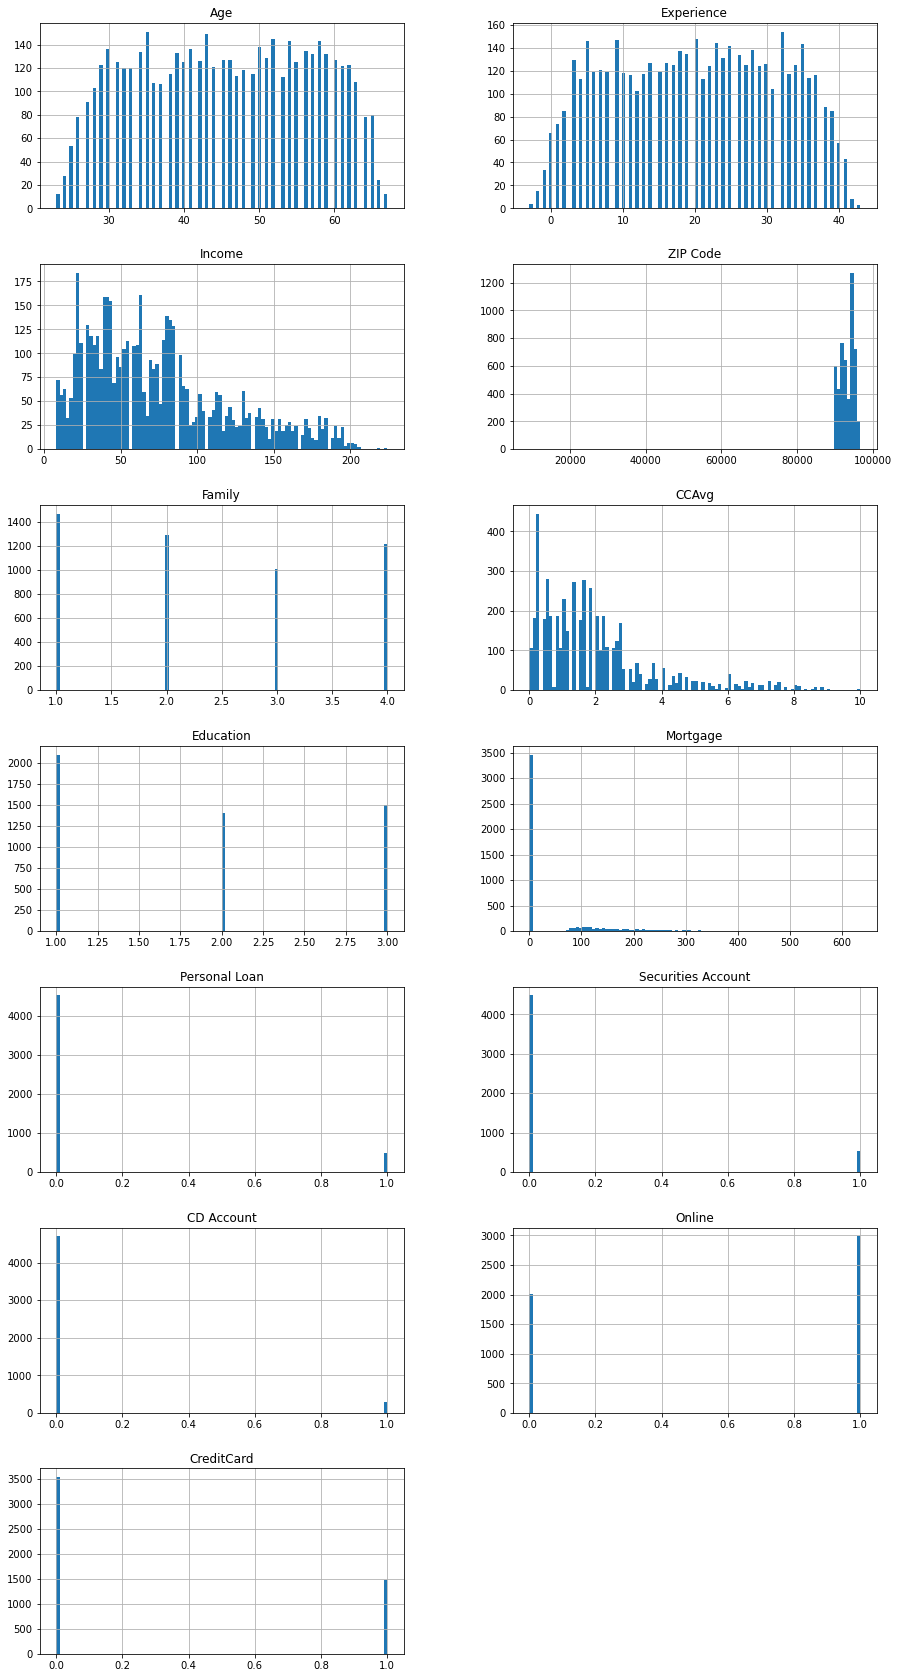

In [13]:
#Univariate graphs generated from the data
(df_bank_loan.iloc[:,1:]).hist(stacked=True, bins=100, figsize=(15,30), layout=(7,2)); 

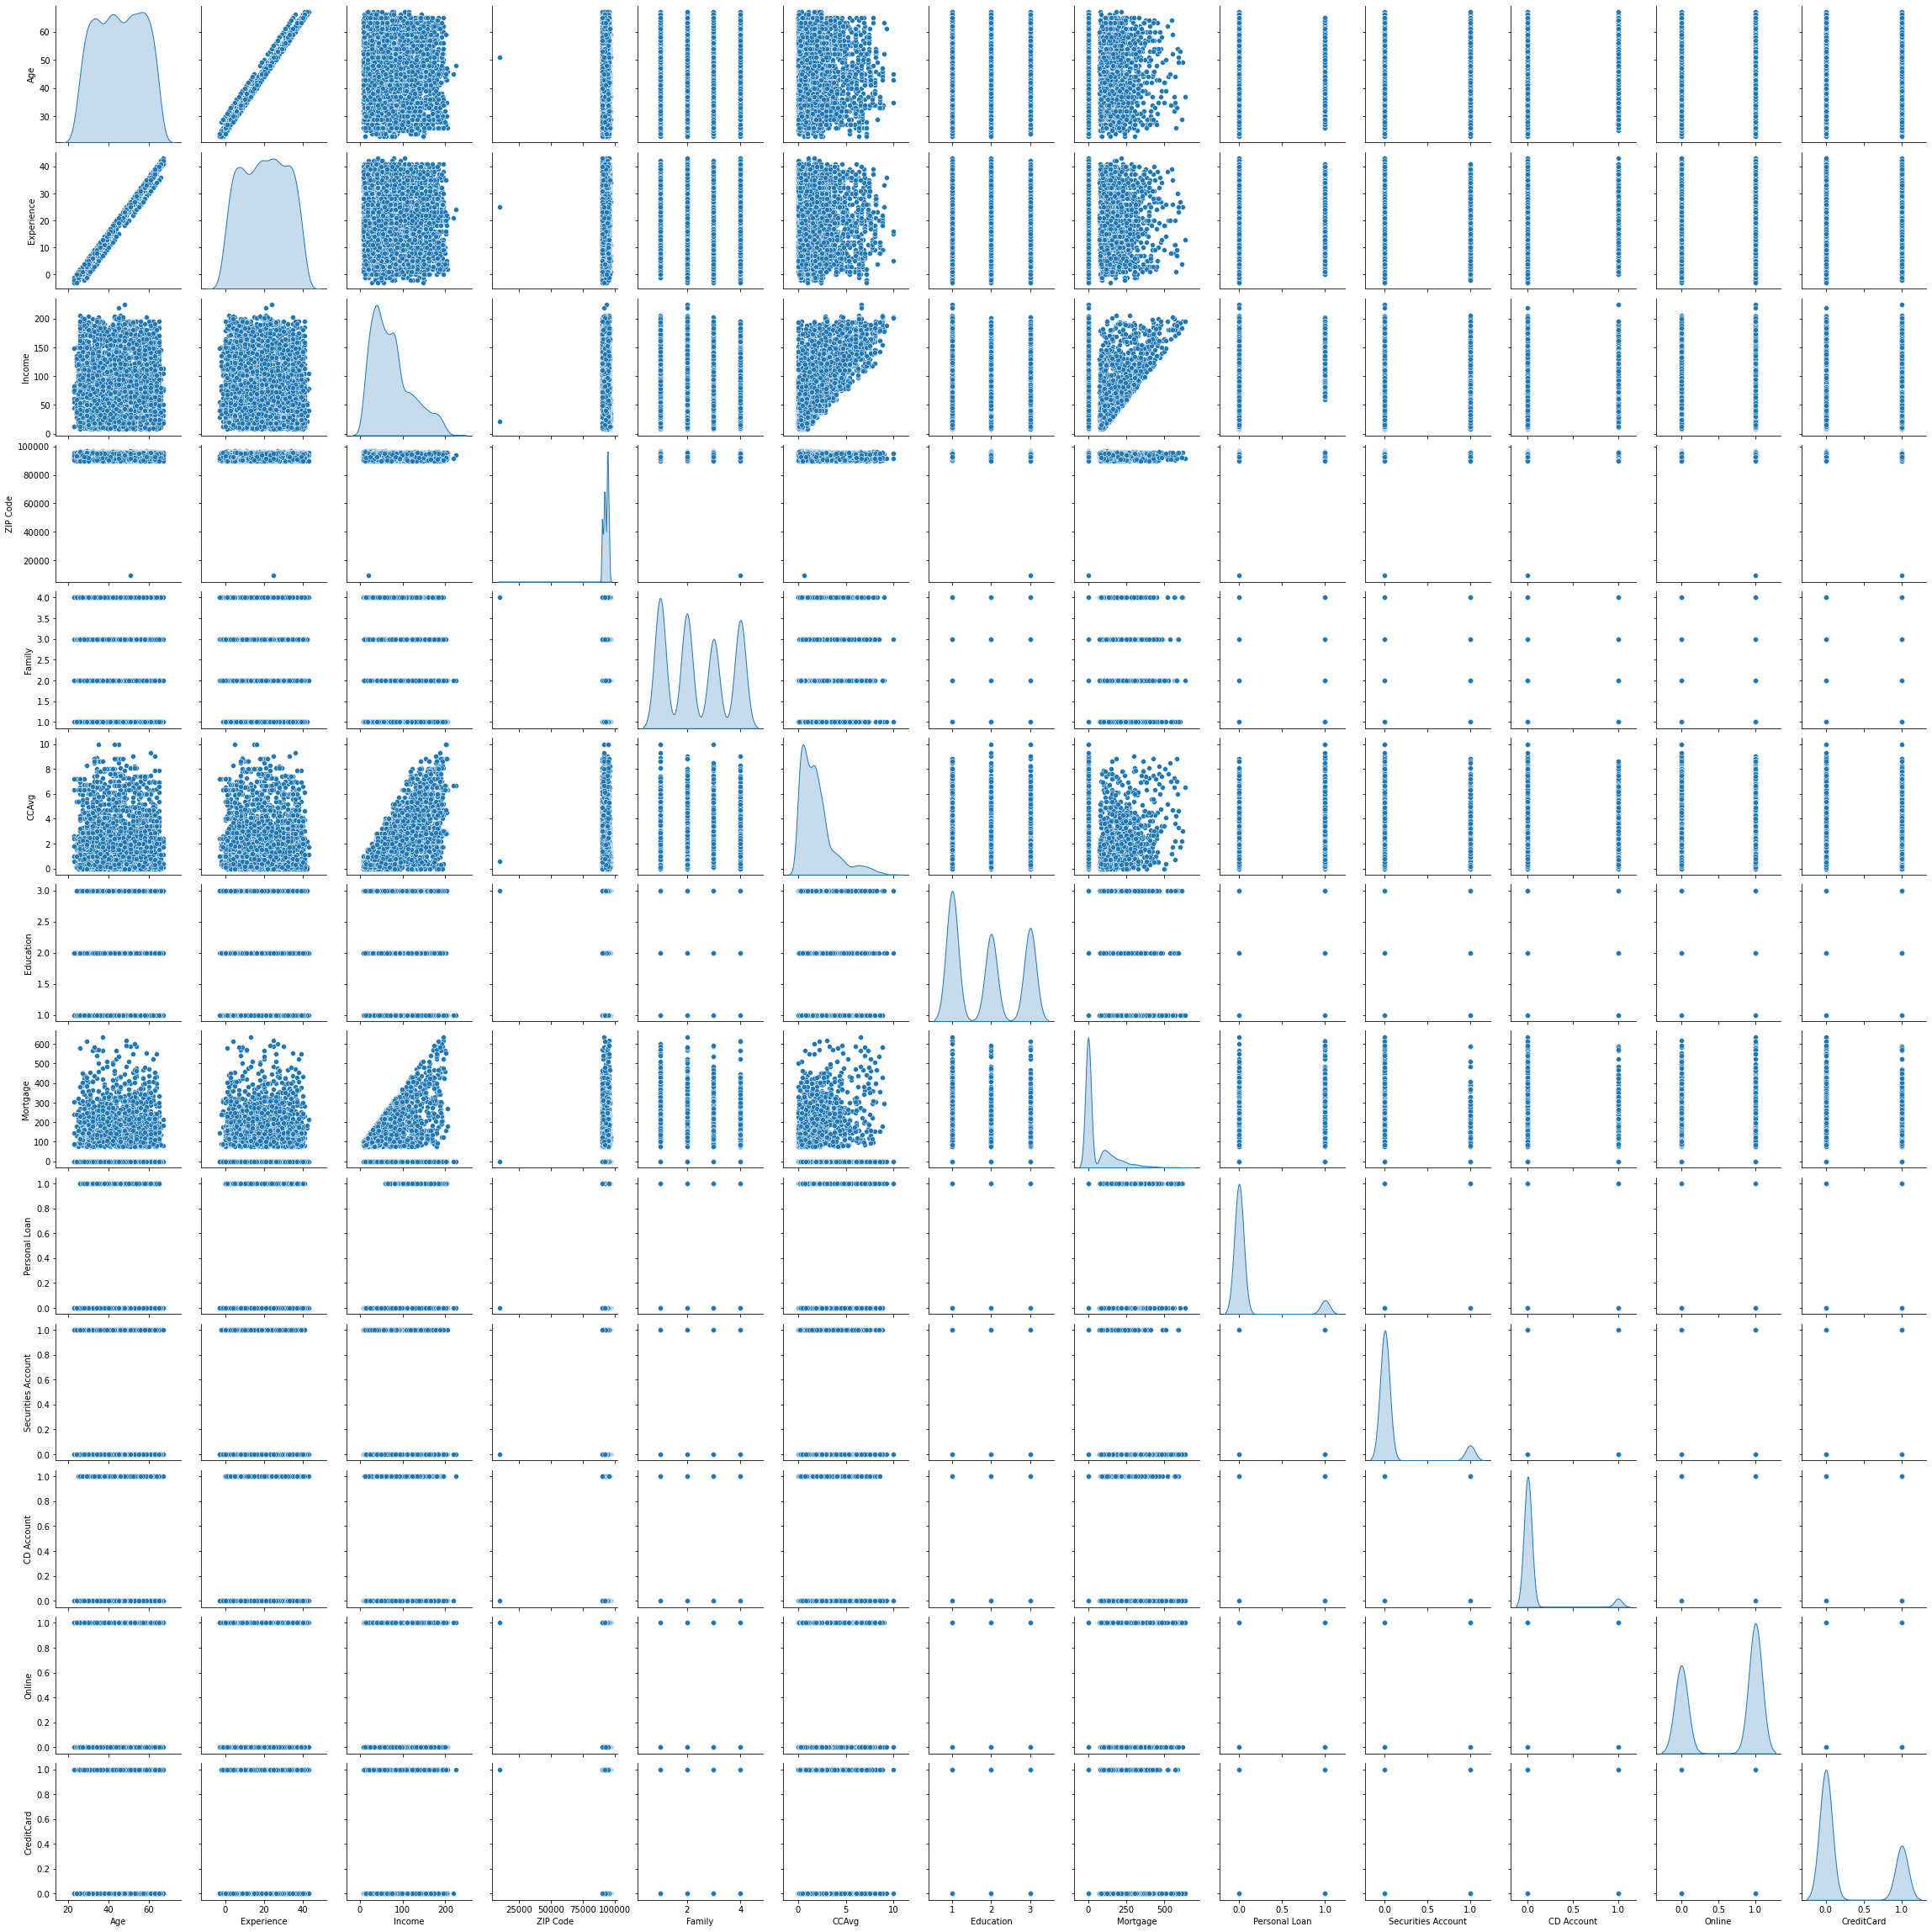

In [14]:
sns.pairplot((df_bank_loan.iloc[:,1:]),diag_kind='kde');

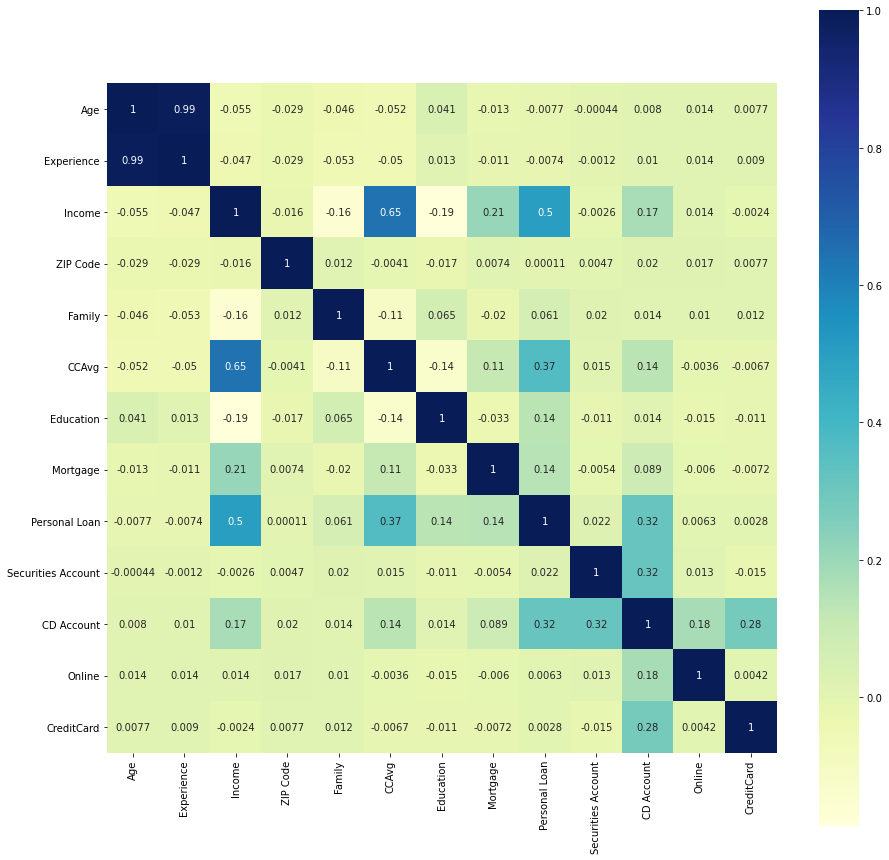

In [15]:
plt.figure(figsize=(15,15))
sns.heatmap((df_bank_loan.iloc[:,1:]).corr(),annot=True, cmap="YlGnBu", square=True);

Insights - Income has correlation with respect to CCAvg spend and personal loan. Remaining data has a low corelation with each other

## - Get data model ready

In [16]:
df_bank_loan.head(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [17]:
df_bank_loan.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [18]:
len(df_bank_loan[df_bank_loan['Experience']<0])

52

In [18]:
# Code below is to treat negative values in experience with positive values. 
for index, row in df_bank_loan.iterrows():
    if df_bank_loan.loc[index,'Experience'] < 0:
        df_bank_loan.loc[index,'Experience'] = abs(df_bank_loan.loc[index,'Experience'])

Negative experience in the data is assumed as a incorrect value due to typo hence it's converted to a positive value. Considering it's 1% of total data, this is not going to have much impact to the model

## - Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [45]:
# Following code is used to split the data to 70% training and 30% test set
X = df_bank_loan.drop('Personal Loan',axis=1)   
Y = df_bank_loan['Personal Loan']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=36)
x_train.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1631,1632,61,36,153,91105,1,2.6,2,0,1,1,0,1
2225,2226,54,24,25,90505,4,0.4,3,115,0,0,0,0
4777,4778,32,8,30,94534,4,0.4,2,78,0,0,1,0
3754,3755,63,37,112,93106,4,2.4,3,0,0,0,1,1
3196,3197,37,7,73,94043,4,1.8,3,0,0,0,1,1


In [46]:
# Following code is validate whether the split is carried out code as intended above.
print("{0:0.2f}% data is in training set".format((len(x_train)/len(df_bank_loan.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(df_bank_loan.index)) * 100))

70.00% data is in training set
30.00% data is in test set


In [47]:
# The following code is used to cross check whether categorical attribute value to be predicted is distributed 
# evenly across original vs training vs test dataset.
print("Original Personal Loan 1 Values    : {0} ({1:0.2f}%)".format(len(df_bank_loan.loc[df_bank_loan['Personal Loan'] == 1]), (len(df_bank_loan.loc[df_bank_loan['Personal Loan'] == 1])/len(df_bank_loan.index)) * 100))
print("Original Personal Loan 0 Values   : {0} ({1:0.2f}%)".format(len(df_bank_loan.loc[df_bank_loan['Personal Loan'] == 0]), (len(df_bank_loan.loc[df_bank_loan['Personal Loan'] == 0])/len(df_bank_loan.index)) * 100))
print("")
print("Training Personal Loan 1 Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Personal Loan 0 Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Personal Loan 1 Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Personal Loan 0 Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Personal Loan 1 Values    : 480 (9.60%)
Original Personal Loan 0 Values   : 4520 (90.40%)

Training Personal Loan 1 Values    : 327 (9.34%)
Training Personal Loan 0 Values   : 3173 (90.66%)

Test Personal Loan 1 Values        : 153 (10.20%)
Test Personal Loan 0 Values       : 1347 (89.80%)



## 10.  Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)

In [48]:
# Following code is used to create a model and train it using the training dataset. Print coefficient and y intercept.
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = pd.DataFrame()
y_predict['Predictions'] = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
coef_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,intercept
0,-0.00006,0.008024,0.006556,0.035437,-0.000069,0.009315,0.00534,0.009692,0.000786,0.000552,0.002769,-0.000404,-0.000268,-0.000048


In [49]:
# Following is used to find a model score.
model_score = model.score(x_test, y_test)
print(" The model score is {0:0.5f}".format(model_score))

 The model score is 0.91133


[[  55   98]
 [  35 1312]]


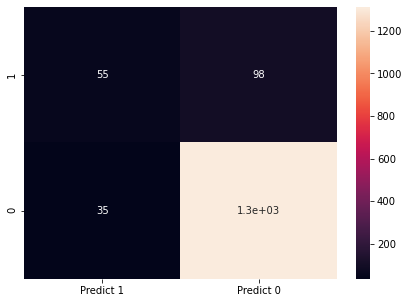

In [50]:
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])
print(cm)
df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True);

In [51]:
TP = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TN = cm[1,1]

recall = TP/(TP+FN)
precision = TP/(TP+FP)

y_test_array = y_test.values
y_predict_array = y_predict.values

print("Recall score : {0:0.5f}".format(recall))
print("Precision score : {0:0.5f}".format(precision))

print("Accuracy score :  {0:0.5f}".format(metrics.accuracy_score(y_test,y_predict)))
print("F1 score : {0:0.5f}".format(metrics.f1_score(y_test, y_predict)))
print("ROC AUC score : {0:0.5f}".format(metrics.roc_auc_score(y_test, y_predict)))

Recall score : 0.61111
Precision score : 0.35948
Accuracy score :  0.91133
F1 score : 0.45267
ROC AUC score : 0.66675


## 11. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [52]:
(df_bank_loan.iloc[:,1:]).corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.993991,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.993991,1.000000,-0.046876,-0.028936,-0.051851,-0.049738,0.013919,-0.011097,-0.008304,-0.000989,0.009735,0.014051,0.008851
Income,-0.055269,-0.046876,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028936,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.051851,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.049738,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013919,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.011097,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.008304,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000989,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


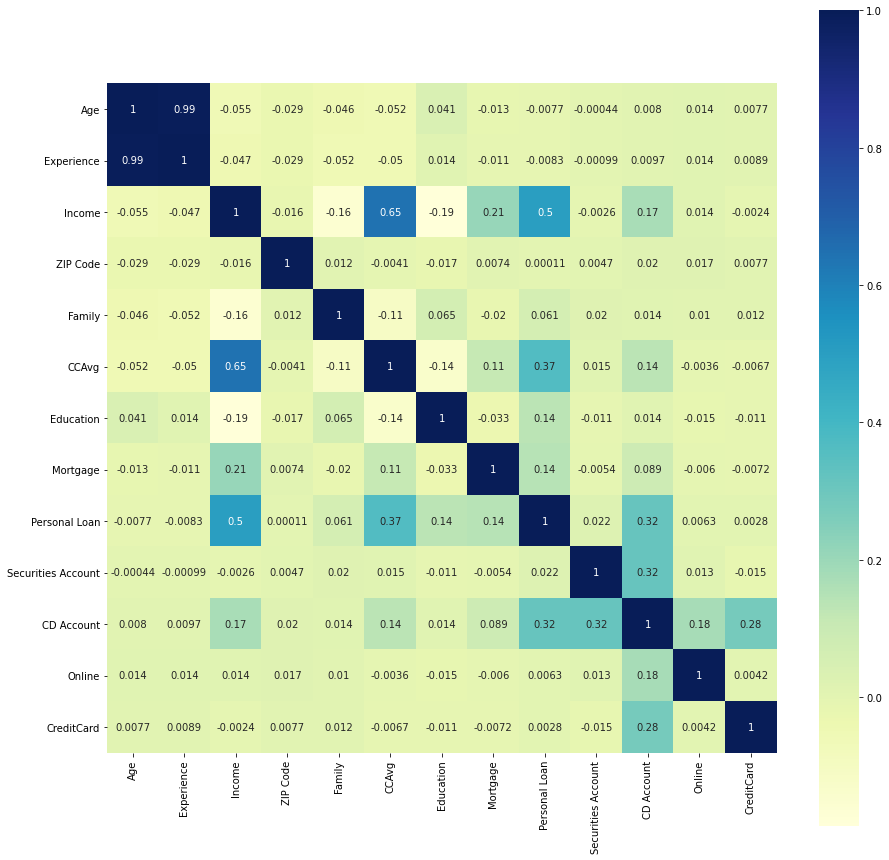

In [53]:
#Correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap((df_bank_loan.iloc[:,1:]).corr(),annot=True, cmap="YlGnBu", square=True);

Insights - Income has coorelation with respect to CCAvg spend and personal loan. Remaining data has a low corelation with each other

In [54]:
# Code to identify Y Actual and Y Predict values are not incorrect
df_final = x_test.copy()
df_final = pd.merge(df_final, y_test, left_index=True, right_index=True)
df_final.rename(columns={'Personal Loan':'Y_Actual'},inplace=True)

counter = 0
for index, row in df_final.iterrows():
    df_final.loc[index, 'Y_Predict'] = int(y_predict.loc[counter, 'Predictions'])
    counter+=1

df_final[df_final['Y_Actual'] != df_final['Y_Predict']]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Y_Actual,Y_Predict
4494,4495,29,4,182,95354,1,3.70,3,0,0,0,1,0,1,0.0
2910,2911,46,22,102,95039,3,4.50,3,0,0,0,1,0,1,0.0
3988,3989,59,35,85,91330,1,3.40,3,0,0,1,0,1,1,0.0
3318,3319,46,20,105,90089,4,3.20,1,0,0,0,0,0,1,0.0
1244,1245,33,8,130,94720,3,6.30,2,99,0,0,0,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,2624,42,17,111,94304,3,3.00,1,0,1,1,0,1,1,0.0
800,801,31,7,173,91040,1,6.00,1,0,0,0,1,0,0,1.0
1870,1871,63,37,110,95032,1,4.10,3,0,0,0,0,0,1,0.0
1067,1068,50,24,195,95035,1,1.70,1,0,0,0,0,0,0,1.0


Insight - Based on the output, there are around 133 out of 1500 rows in test dataset that have a different Y Actual and Y Predict. This is 91.13% ((1500-133)/1500*100) which is accuracy score of the model calculated in few steps above.

## 12 Give conclusion related to the Business understanding of your model? (5 marks)

- Correctly predicted that 55 people will get Personal Loan. 
- Correctly predicted that 1312 poeple will not get Personal Loan
- Incorrectly predicted that 98 people will not get Personal Loan
- Incorrectly predicted that 35 poeple will get Personal Loan.